In [22]:
from sqlalchemy import create_engine, text
import sqlalchemy as sa
import pandas as pd
import seaborn as sns
from datetime import datetime

DB_FILE = 'sakila_master.db'

engine = create_engine(f'sqlite:///{DB_FILE}')

print(f'CONNEXION SUCESS: {DB_FILE}')

SQL_QUERY = text("""SELECT * FROM actor;""")
metadata = sa.MetaData()
metadata.reflect(bind=engine)
tables_list = list(metadata.tables.keys())

print(f'TABLES NAMES: {tables_list}')

try:
    with engine.connect() as connexion:
        result = connexion.execute(SQL_QUERY)
        column_names = list(result.keys())
        df = pd.DataFrame(result)

except:
    print('BUG')

CONNEXION SUCESS: sakila_master.db
TABLES NAMES: ['actor', 'address', 'city', 'country', 'category', 'customer', 'store', 'staff', 'film', 'language', 'film_actor', 'film_category', 'film_text', 'inventory', 'payment', 'rental']


In [23]:
df

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2020-12-23 07:12:29
1,2,NICK,WAHLBERG,2020-12-23 07:12:29
2,3,ED,CHASE,2020-12-23 07:12:29
3,4,JENNIFER,DAVIS,2020-12-23 07:12:29
4,5,JOHNNY,LOLLOBRIGIDA,2020-12-23 07:12:29
...,...,...,...,...
195,196,BELA,WALKEN,2020-12-23 07:12:31
196,197,REESE,WEST,2020-12-23 07:12:31
197,198,MARY,KEITEL,2020-12-23 07:12:31
198,199,JULIA,FAWCETT,2020-12-23 07:12:31


## 📝 4 Exercices de SQL Pur

### Exercices de Lecture (SELECT)

1.  **Affichage, Alias, Ordre et Limite :** Affichez les **5 titres de films** (`title` de la table `film`) classés par **ordre alphabétique croissant**, en utilisant un **alias** pour la colonne.
2.  **Agrégation :** Calculez la **moyenne**, le **minimum**, le **maximum**, le **nombre total** et la **somme** du champ `length` (durée en minutes) de tous les films dans la table `film`.

---

### Exercices de Modification (INSERT / UPDATE)

3.  **Insertion (`INSERT`) avec gestion d'ID et de Date :**
    * **Insérez** un nouvel acteur avec le prénom `"JEAN-CLAUDE"`, le nom `"VANDAMME"`, le nouvel ID calculé, et la date/heure actuelle pour le champ **`last_update`**.
      * **Trouvez** l'**`actor_id` maximum** existant dans la table `actor`, puis **calculez le nouvel ID** en ajoutant 1.
      * **Format de date requis pour le `last_update` :** Utilisez le module `datetime` pour générer la chaîne `YYYY-MM-DD HH:MM:SS`.

4.  **Modification (`UPDATE`) par ID :** **Modifiez** l'acteur que vous venez d'insérer (en le ciblant par son **ID unique**) pour changer son prénom de `"JEAN-CLAUDE"` à `"JC"`.

In [24]:
def select_from_db(engine, query) :
    query = text(f"""{query}""")
    try:
        with engine.connect() as connexion:
            result = connexion.execute(query)
            df = pd.DataFrame(result)
            return df
    except :
        print('BUG') 

In [25]:
sql_query = 'SELECT title AS [Top 5 Film alphabetical] FROM film ORDER BY title LIMIT 5;'
select_from_db(engine, sql_query)

,Top 5 Film alphabetical
0,ACADEMY DINOSAUR
1,ACE GOLDFINGER
2,ADAPTATION HOLES
3,AFFAIR PREJUDICE
4,AFRICAN EGG


In [26]:
sql_query = 'SELECT AVG(length), MIN(length), MAX(length), COUNT(length), SUM(length) FROM film'
select_from_db(engine, sql_query)

,AVG(length),MIN(length),MAX(length),COUNT(length),SUM(length)
0,115.272,46,185,1000,115272


In [27]:
return_query = 'SELECT * FROM actor'

max_id = max(select_from_db(engine, return_query).actor_id)
select_from_db(engine, return_query)

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2020-12-23 07:12:29
1,2,NICK,WAHLBERG,2020-12-23 07:12:29
2,3,ED,CHASE,2020-12-23 07:12:29
3,4,JENNIFER,DAVIS,2020-12-23 07:12:29
4,5,JOHNNY,LOLLOBRIGIDA,2020-12-23 07:12:29
...,...,...,...,...
195,196,BELA,WALKEN,2020-12-23 07:12:31
196,197,REESE,WEST,2020-12-23 07:12:31
197,198,MARY,KEITEL,2020-12-23 07:12:31
198,199,JULIA,FAWCETT,2020-12-23 07:12:31


In [28]:
current_time = datetime.now().strftime("%Y-%m-%d %X")

sql_query = f"INSERT INTO actor ('actor_id', 'first_name', 'last_name', 'last_update') VALUES ({max_id+1}, 'JEAN-CLAUDE', 'VANDAMME', '{current_time}');"
insert_query = text(f"""{sql_query}""")

try:
    with engine.connect() as connexion:
        connexion.execute(insert_query)
        connexion.commit()
        df = select_from_db(engine, return_query)
except :
    print('BUG')

In [29]:
sql_query = 'SELECT * FROM actor'
select_from_db(engine, sql_query)

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2020-12-23 07:12:29
1,2,NICK,WAHLBERG,2020-12-23 07:12:29
2,3,ED,CHASE,2020-12-23 07:12:29
3,4,JENNIFER,DAVIS,2020-12-23 07:12:29
4,5,JOHNNY,LOLLOBRIGIDA,2020-12-23 07:12:29
...,...,...,...,...
196,197,REESE,WEST,2020-12-23 07:12:31
197,198,MARY,KEITEL,2020-12-23 07:12:31
198,199,JULIA,FAWCETT,2020-12-23 07:12:31
199,200,THORA,TEMPLE,2020-12-23 07:12:31


In [30]:
sql_query = f"UPDATE actor SET first_name = 'JC' WHERE actor_id = {max_id+1};"
update_query = text(f"""{sql_query}""")

try:
    with engine.connect() as connexion:
        connexion.execute(update_query)
        connexion.commit()
        df = select_from_db(engine, return_query)
except :
    print('BUG')
df

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2020-12-23 07:12:29
1,2,NICK,WAHLBERG,2020-12-23 07:12:29
2,3,ED,CHASE,2020-12-23 07:12:29
3,4,JENNIFER,DAVIS,2020-12-23 07:12:29
4,5,JOHNNY,LOLLOBRIGIDA,2020-12-23 07:12:29
...,...,...,...,...
196,197,REESE,WEST,2020-12-23 07:12:31
197,198,MARY,KEITEL,2020-12-23 07:12:31
198,199,JULIA,FAWCETT,2020-12-23 07:12:31
199,200,THORA,TEMPLE,2020-12-23 07:12:31


In [31]:
sql_query = f"DELETE FROM actor WHERE last_name = 'VANDAMME';"
delete_query = text(f"""{sql_query}""")

try:
    with engine.connect() as connexion:
        connexion.execute(delete_query)
        connexion.commit()
        df = select_from_db(engine, return_query)
except :
    print('BUG')
df

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2020-12-23 07:12:29
1,2,NICK,WAHLBERG,2020-12-23 07:12:29
2,3,ED,CHASE,2020-12-23 07:12:29
3,4,JENNIFER,DAVIS,2020-12-23 07:12:29
4,5,JOHNNY,LOLLOBRIGIDA,2020-12-23 07:12:29
...,...,...,...,...
195,196,BELA,WALKEN,2020-12-23 07:12:31
196,197,REESE,WEST,2020-12-23 07:12:31
197,198,MARY,KEITEL,2020-12-23 07:12:31
198,199,JULIA,FAWCETT,2020-12-23 07:12:31


## 📝 Énoncés des Exercices 1 & 2 (SQLA → Pandas → Seaborn)

Ces exercices sont conçus pour mettre en œuvre le pipeline en **trois étapes** : Requête SQL (SQLAlchemy), Chargement en DataFrame (Pandas) et Visualisation (Seaborn).

### Exercice 1 : Distribution des Taux de Location (Taux d'Emprunt)

Cet exercice permet de visualiser la distribution d'une variable numérique simple.

1.  **Requête SQL :** Écrivez une requête SQL pour sélectionner uniquement le champ **`rental_rate`** (taux de location) de la table `^^film^^`.
2.  **Conversion Pandas :** Chargez les résultats de la requête SQL dans un DataFrame Pandas.
3.  **Visualisation (Seaborn) :** Créez un **histogramme** (*histplot*) avec Seaborn pour visualiser la **distribution** de la colonne `rental_rate`.


In [32]:
return_rental = "SELECT rental_rate FROM film;"
df = select_from_db(engine, return_rental)
df

,rental_rate
0,0.99
1,4.99
2,2.99
3,2.99
4,2.99
...,...
995,0.99
996,0.99
997,0.99
998,2.99


<Axes: ylabel='Count'>

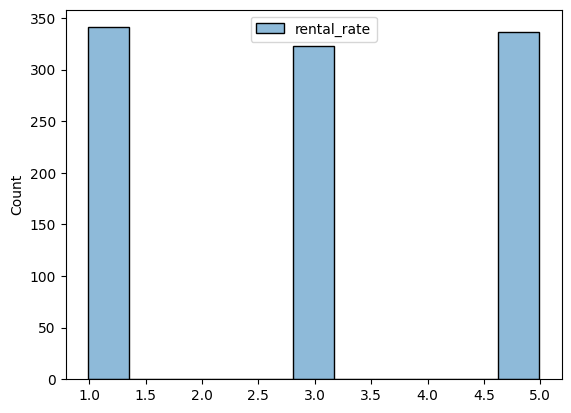

In [33]:
sns.histplot(df)

### Exercice 2 : Durée Moyenne des Films par Classification

Cet exercice utilise une fonction d'agrégation SQL et une visualisation pour la comparaison de catégories.

1.  **Requête SQL :** Écrivez une requête SQL pour calculer la **durée moyenne** (`AVG(length)`) de tous les films pour **chaque classification** (`rating` - ex: G, PG, R) dans la table `^^film^^`.
    * *Indice : Vous devrez utiliser la clause `GROUP BY`.*
2.  **Conversion Pandas :** Chargez les résultats (la classification et sa durée moyenne) dans un DataFrame Pandas.
3.  **Visualisation (Seaborn) :** Créez un **diagramme à barres** (*barplot*) avec Seaborn pour comparer visuellement la durée moyenne (`avg_length`) pour chaque catégorie de classification (`rating`).

---

In [40]:
return_rental = "SELECT rating, AVG(length) AS avg_len FROM film GROUP BY rating;"
df = select_from_db(engine, return_rental)
df

,rating,avg_len
0,G,111.050562
1,NC-17,113.228571
2,PG,112.005155
3,PG-13,120.443946
4,R,118.661538


<Axes: xlabel='rating', ylabel='avg_len'>

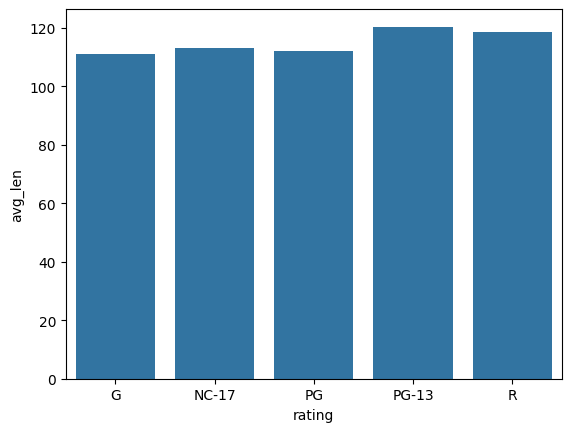

In [43]:
sns.barplot(df, x ='rating', y='avg_len')

### Exercice 1 : Jointure Simple à 2 Tables

**Objectif :** Joindre la table des clients à la table des locations pour trouver les clients les plus actifs récemment.

| Tables Impliquées | Clauses Spécifiques |
| :--- | :--- |
| `customer` et `rental` | Alias, `ORDER BY`, `LIMIT` |

**Énoncé :**

Écrivez une requête SQL pour lister les **10 clients** (`first_name`, `last_name` de la table `customer`) ayant effectué leur location la **plus récente**. Affichez également la date de la location (`rental_date` de la table `rental`).

* **Instructions :**
    * Utilisez des **alias** clairs pour les tables (`c` pour `customer`, `r` pour `rental`).
    * Triez le résultat par la date de location la plus récente (`ORDER BY`).
    * Limitez l'affichage aux 10 premiers résultats (`LIMIT`).

In [ ]:
query = "SELECT c.first_name, c.last_name, r.rental_date FROM customer AS c JOIN rental AS r ON c.customer_id=r.customer_id ORDER BY r.rental_date DESC LIMIT 10;"
df = select_from_db(engine, query)
df

,first_name,last_name,rental_date
0,LOUIS,LEONE,2006-02-14 15:16:03.000
1,NEIL,RENNER,2006-02-14 15:16:03.000
2,NATALIE,MEYER,2006-02-14 15:16:03.000
3,JEREMY,HURTADO,2006-02-14 15:16:03.000
4,NAOMI,JENNINGS,2006-02-14 15:16:03.000
5,REGINA,BERRY,2006-02-14 15:16:03.000
6,GREG,ROBINS,2006-02-14 15:16:03.000
7,JENNY,CASTRO,2006-02-14 15:16:03.000
8,BECKY,MILES,2006-02-14 15:16:03.000
9,ALBERT,CROUSE,2006-02-14 15:16:03.000


### Exercice 2 : Jointure à 3 Tables

**Objectif :** Relier la transaction (`rental`) au contexte du produit (`film`) via la table d'inventaire.

| Tables Impliquées | Clauses Spécifiques |
| :--- | :--- |
| `rental`, `inventory` et `film` | Alias, `ORDER BY`, `LIMIT`, `WHERE` |

**Énoncé :**

Quel est le **titre du film** (`title` de la table `film`) et la **date de location** (`rental_date` de la table `rental`) des **5 dernières locations** ?

* **Filtre :** Incluez uniquement les films dont la classification (`rating`) est `'PG-13'`.
* **Instructions :**
    * Triez par la date de location la plus récente (`ORDER BY`).
    * Limitez l'affichage aux 5 premiers résultats (`LIMIT`).

In [56]:
query = "SELECT f.title, r.rental_date FROM rental AS r JOIN inventory AS i ON r.inventory_id=i.inventory_id JOIN film AS f on i.film_id=f.film_id WHERE f.rating = 'PG-13' ORDER BY r.rental_date DESC LIMIT 5;"
df = select_from_db(engine, query)
df

,title,rental_date
0,WORLD LEATHERNECKS,2006-02-14 15:16:03.000
1,WANDA CHAMBER,2006-02-14 15:16:03.000
2,THEORY MERMAID,2006-02-14 15:16:03.000
3,SWARM GOLD,2006-02-14 15:16:03.000
4,STREAK RIDGEMONT,2006-02-14 15:16:03.000


### Exercice 3 : Jointure à 4 Tables (Liaison Many-to-Many)

**Objectif :** Traverser une table de liaison pour relier des entités et ajouter une dimension (langue).

| Tables Impliquées | Clauses Spécifiques |
| :--- | :--- |
| `actor`, `film_actor`, `film` et `language` | Alias, `LIMIT`, `WHERE`, `DISTINCT` |

**Énoncé :**

Listez les **15 premiers acteurs** (`first_name`, `last_name` de la table `actor`) qui ont joué dans des films dont la **langue originale** (`name` de la table `language`) est l'**Anglais** (`'English'`). Affichez uniquement le nom et le prénom de l'acteur.

* **Instructions :**
    * Utilisez **`DISTINCT`** pour garantir que chaque acteur n'apparaisse qu'une seule fois.
    * Triez par le nom de famille de l'acteur (`ORDER BY`).
    * Limitez le résultat à 15 entrées (`LIMIT`).

In [63]:
query = "SELECT DISTINCT a.first_name, a.last_name FROM actor AS a JOIN film_actor AS fa ON a.actor_id=fa.actor_id JOIN film AS f on fa.film_id=f.film_id JOIN language AS l on f.language_id = l.language_id WHERE l.name = 'English' ORDER BY a.last_name LIMIT 15;"
df = select_from_db(engine, query)
df

,first_name,last_name
0,CHRISTIAN,AKROYD
1,KIRSTEN,AKROYD
2,DEBBIE,AKROYD
3,CUBA,ALLEN
4,KIM,ALLEN
5,MERYL,ALLEN
6,ANGELINA,ASTAIRE
7,RUSSELL,BACALL
8,JESSICA,BAILEY
9,AUDREY,BAILEY


### Exercice 4 : Jointure à 5 Tables (Transaction et Structure)

**Objectif :** Intégrer la dimension humaine (`staff`) et structurelle (`store`) à la transaction (`rental`) et au produit (`film`).

| Tables Impliquées | Clauses Spécifiques |
| :--- | :--- |
| `rental`, `inventory`, `film`, `store` et `staff` | Alias, `ORDER BY`, `LIMIT`, `WHERE` |

**Énoncé :**

Pour le **magasin n°2** (`store_id = 2`), listez les **5 derniers films loués** (`title` de la table `film`), la **date de location** (`rental_date` de la table `rental`) et le **prénom/nom de l'employé** (`first_name`, `last_name` de la table `staff`) qui a géré la transaction.

* **Instructions :**
    * Utilisez la clause `WHERE` pour filtrer sur le magasin n°2.
    * Triez par la date de location la plus récente (`ORDER BY`).
    * Limitez l'affichage aux 5 résultats (`LIMIT`).

In [69]:
query = "SELECT f.title, r.rental_date, sf.first_name, sf.last_name FROM film AS f JOIN inventory AS i ON f.film_id=i.film_id JOIN store AS s on i.store_id=s.store_id JOIN rental AS r on i.inventory_id = r.inventory_id JOIN staff AS sf ON s.store_id=sf.store_id WHERE s.store_id=2 ORDER BY r.rental_date DESC LIMIT 5;"
df = select_from_db(engine, query)
df

,title,rental_date,first_name,last_name
0,ACE GOLDFINGER,2006-02-14 15:16:03.000,Jon,Stephens
1,AFFAIR PREJUDICE,2006-02-14 15:16:03.000,Jon,Stephens
2,AFRICAN EGG,2006-02-14 15:16:03.000,Jon,Stephens
3,ALI FOREVER,2006-02-14 15:16:03.000,Jon,Stephens
4,AMADEUS HOLY,2006-02-14 15:16:03.000,Jon,Stephens


### Exercice 5 : Jointure de Navigation et Agrégation (6 Tables)

**Objectif :** Naviguer à travers de nombreuses tables de dimensions pour filtrer les clients (par ville) et effectuer une agrégation sur les paiements.

| Tables Impliquées | Clauses Spécifiques |
| :--- | :--- |
| `customer`, `address`, `city`, `country`, `payment` | Alias, `GROUP BY`, `HAVING`, `ORDER BY`, Fonctions d'agrégation (`SUM`) |

**Énoncé :**

Trouvez le **montant total des paiements** (`SUM(amount)` de la table `payment`) effectués par les clients qui vivent dans la ville de **"London"** (`city` de la table `city`). Affichez le prénom et le nom du client.

* **Filtres et Agrégation :**
    * Regroupez les résultats par client (`GROUP BY`).
    * N'incluez que les clients ayant dépensé plus de **100.00** unités monétaires (`HAVING`).
* **Instructions :**
    * Triez le résultat par le montant total dépensé (décroissant) (`ORDER BY`).

In [82]:
query = "SELECT c.first_name, c.last_name, SUM(p.amount) AS total_spend FROM customer AS c JOIN payment AS p ON c.customer_id=p.customer_id JOIN address AS a ON c.address_id=a.address_id JOIN city AS city ON a.city_id=city.city_id JOIN country AS count ON city.country_id=count.country_id WHERE city.city = 'London' GROUP BY c.customer_id HAVING total_spend > 100.00 LIMIT 5;"
df = select_from_db(engine, query)
df

,first_name,last_name,total_spend
0,CECIL,VINES,115.74
